## ANOVA tests on titanic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# replacing null values of age with median
df['age'] = df['age'].fillna(df['age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### One way anova : There is difference between ages of first, second and third class passengers
Null Hypothesis: There is no differecne\
Alternative Hypothesis: There is difference

In [6]:
# stats models
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Anova test for age and pclass
model  = ols('age ~ pclass', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
pclass,17429.695048,1.0,116.122704,1.558883e-25
Residual,133436.428421,889.0,NaN,NaN


In [7]:
# print the results based on if-else condition
if anova_table['PR(>F)'][0] < 0.05:
    print("The null hypothesis is rejected")
else:
    print("The null hypothesis is accepted")

The null hypothesis is rejected


C:\Users\UZAIR\AppData\Local\Temp\ipykernel_14704\4247589303.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


## Posthoc test

In [8]:
# Tukecy HSD pairwise comparision
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tuckey = pairwise_tukeyhsd(endog=df['age'], groups=df['pclass'], alpha=0.05)
tuckey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-7.0467,0.0,-9.9299,-4.1636,True
1,3,-10.8795,0.0,-13.226,-8.533,True
2,3,-3.8328,0.0009,-6.3169,-1.3486,True


<Axes: xlabel='pclass', ylabel='age'>

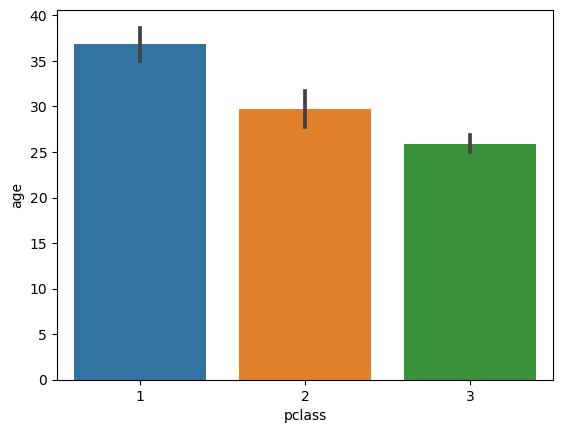

In [9]:
sns.barplot(x='pclass', y='age', data=df)

## Two way anova

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Anova test for age and pclass
model  = ols('age ~ pclass * who', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
who,42921.503765,2.0,213.017404,3.006796e-76
pclass,11863.085431,1.0,117.751870,7.658356e-26
pclass:who,1354.296985,2.0,6.721312,1.267414e-03
Residual,89160.627671,885.0,NaN,NaN


In [11]:
# posthoc test
# Tukecy HSD pairwise comparision
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tuckey = pairwise_tukeyhsd(df['age'], df['pclass'] * df['who'], alpha=0.05)
tuckey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
child,childchild,-3.2763,0.9988,-17.8994,11.3468,False
child,childchildchild,-1.0024,1.0,-14.3937,12.3889,False
child,man,32.0245,0.0,18.959,45.0901,True
child,manman,25.2608,0.0,12.1321,38.3895,True
child,manmanman,20.8822,0.0,8.0148,33.7496,True
child,woman,26.9382,0.0,13.7766,40.0999,True
child,womanwoman,24.233,0.0,10.9181,37.548,True
child,womanwomanwoman,20.0879,0.0001,7.0086,33.1672,True
childchild,childchildchild,2.2739,0.995,-5.9803,10.5281,False
childchild,man,35.3009,0.0,27.5863,43.0154,True
